In [2]:
#Mounting the gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#copying the file
!cp '/content/drive/MyDrive/rsna-pneumonia-detection-challenge.zip' 'rsna-pneumonia-detection-challenge.zip'

In [4]:
#unzipping the file
!unzip 'rsna-pneumonia-detection-challenge.zip'

Streaming output truncated to the last 5000 lines.
  inflating: stage_2_train_images/d5231546-354e-4071-9af1-6644beabfd86.dcm  
  inflating: stage_2_train_images/d5252a78-3ea1-48e9-9ffb-e7535be3ce80.dcm  
  inflating: stage_2_train_images/d525eafb-8908-45fd-a942-48d07c435487.dcm  
  inflating: stage_2_train_images/d5265640-17db-4880-866d-d2952e32941c.dcm  
  inflating: stage_2_train_images/d5277276-f8f8-40e9-b8e1-791cf5d96ac0.dcm  
  inflating: stage_2_train_images/d528d9e9-647a-4e2e-a16c-bd5e32a5bbf5.dcm  
  inflating: stage_2_train_images/d5293a3e-f050-4b98-8bbf-1f40e25bced5.dcm  
  inflating: stage_2_train_images/d52cbb5a-1d0a-457d-8c72-0f7aeec21ca7.dcm  
  inflating: stage_2_train_images/d52ce67b-be7c-4349-8dc4-38562928d208.dcm  
  inflating: stage_2_train_images/d535a3c8-c4a4-4856-b5cd-17f6332eac8b.dcm  
  inflating: stage_2_train_images/d5360dc4-6bea-4a7b-bc49-5b2547ad7877.dcm  
  inflating: stage_2_train_images/d5364bc1-bc2a-4bd0-a1bd-0cfb5a369ccc.dcm  
  inflating: stage_2_trai

In [5]:
#file names and directory
#ls

In [6]:
#for data manipulation
import pandas as pd

In [7]:
#training data
train = pd.read_csv('stage_2_train_labels.csv')

In [8]:
train.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [9]:
class_details = pd.read_csv('stage_2_detailed_class_info.csv')

In [10]:
class_details.head()

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


In [11]:
#for plotting and numerical extensions
import matplotlib.pyplot as plt

In [12]:
#merging the two dataframes
train = pd.concat([train,class_details["class"]],axis=1,sort=False)

train = train.drop_duplicates()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30227 entries, 0 to 30226
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
 6   class      30227 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.8+ MB


In [13]:
train.head()

,patientId,x,y,width,height,Target,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity


In [14]:
#checking number of rows and columns 
train.shape

(30227, 7)

In [15]:
#checking for null values
train.isna().sum()

patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
class            0
dtype: int64

In [16]:
#as the null values are of float type and cannot drop the null value rows as the datas are needed, null values are filled with 0.0 
train = train.fillna('0.0')

In [17]:
#double-checking null values
train.isna().sum()

patientId    0
x            0
y            0
width        0
height       0
Target       0
class        0
dtype: int64

In [18]:
#checking the target column
train.groupby('Target').size()

Target
0    20672
1     9555
dtype: int64

<Axes: xlabel='Target'>

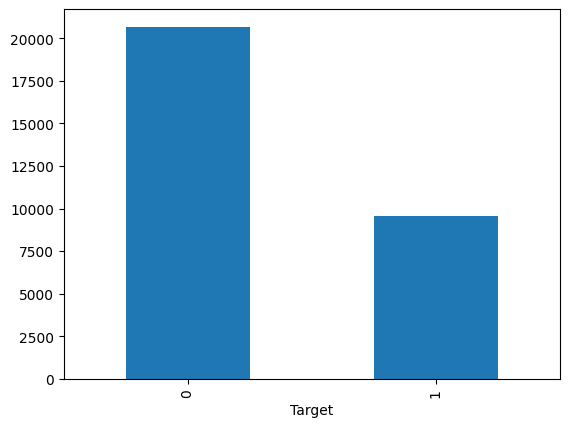

In [19]:
#bar plot
train.groupby('Target').size().plot.bar()

In [20]:
#checking the class column
train.groupby('class').size()

class
Lung Opacity                     9555
No Lung Opacity / Not Normal    11821
Normal                           8851
dtype: int64

<Axes: ylabel='class'>

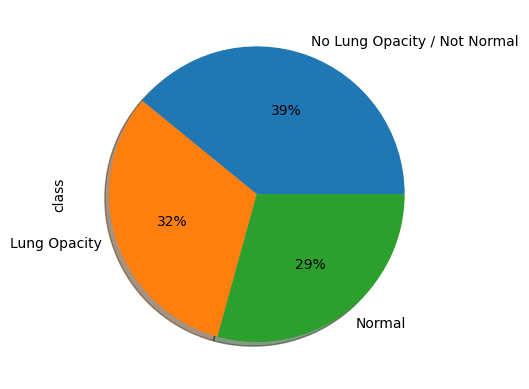

In [21]:
#pie chart
train["class"].value_counts().plot(kind='pie',autopct='%1.0f%%', shadow=True, subplots=False)

<Axes: xlabel='class', ylabel='count'>

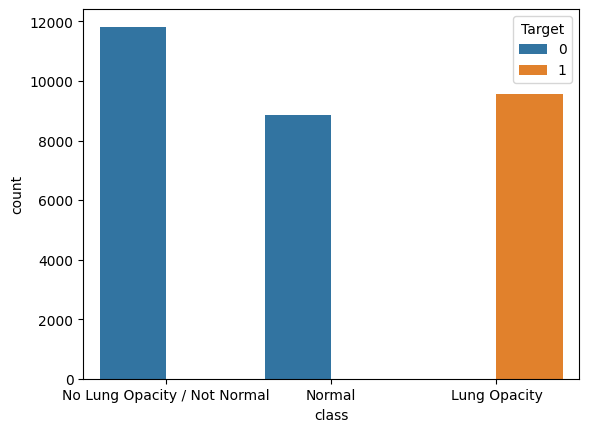

In [22]:
#Countplot
import seaborn as sns
sns.countplot(x = 'class', hue = 'Target', data = train)

In [23]:
#pip install dicom

In [24]:
pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 60.9 MB/s eta 0:00:00


In [25]:
import pydicom

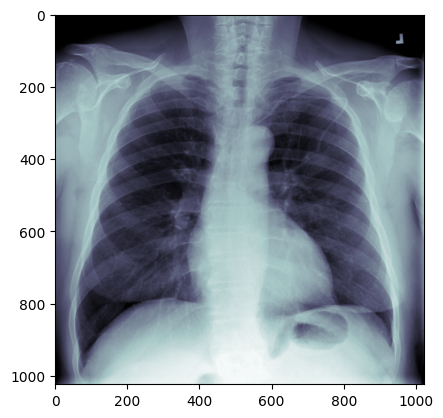

In [26]:
#displaying an image
ds = pydicom.dcmread('/content/stage_2_train_images/ff1bc114-1975-4f8f-9015-54f0d90eb445.dcm')
  
plt.imshow(ds.pixel_array, cmap=plt.cm.bone)  # set the color map to bone
plt.show()

In [27]:
train.head()

,patientId,x,y,width,height,Target,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0.0,0.0,0.0,0.0,0,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,0.0,0.0,0.0,0.0,0,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,0.0,0.0,0.0,0.0,0,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,0.0,0.0,0.0,0.0,0,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity


In [28]:
#checking the datatypes
train.dtypes

patientId    object
x            object
y            object
width        object
height       object
Target        int64
class        object
dtype: object

In [29]:
#as the columns x,y,width,height need to be converted to float type 

In [30]:
train.columns


Index(['patientId', 'x', 'y', 'width', 'height', 'Target', 'class'], dtype='object')

In [31]:
col = ['x', 'y', 'width', 'height']

In [32]:
for i in col:
  train[i] = train[i].astype(float)

In [33]:
train.dtypes

patientId     object
x            float64
y            float64
width        float64
height       float64
Target         int64
class         object
dtype: object

In [34]:
#checking the correlation
train.corr()

,x,y,width,height,Target
x,1.000000,0.762055,0.795007,0.735061,0.846951
y,0.762055,1.000000,0.811707,0.634177,0.897660
width,0.795007,0.811707,1.000000,0.915537,0.950152
height,0.735061,0.634177,0.915537,1.000000,0.865294
Target,0.846951,0.897660,0.950152,0.865294,1.000000


In [35]:
#dropping the target column
train = train.drop('Target',axis =1)

In [36]:
#model building

In [37]:
import os
import csv
import random
import numpy as np
from skimage import measure

In [39]:
pneumonia_locations = {}
# load table
with open(os.path.join('/content/stage_2_train_labels.csv'), mode='r') as infile:
    # open reader
    reader = csv.reader(infile)
    # skip header
    next(reader, None)
    # loop through rows
    for rows in reader:
        # retrieve information
        filename = rows[0]
        location = rows[1:5]
        pneumonia = rows[5]
        # if row contains pneumonia add label to dictionary
        # which contains a list of pneumonia locations per filename
        if pneumonia == '1':
            # convert string to float to int
            location = [int(float(i)) for i in location]
            # save pneumonia location in dictionary
            if filename in pneumonia_locations:
                pneumonia_locations[filename].append(location)
            else:
                pneumonia_locations[filename] = [location]

In [41]:
# load and shuffle filenames
folder = '/content/stage_2_train_images'
filenames = os.listdir(folder)
random.shuffle(filenames)
# split into train and validation filenames
n_valid_samples = 8000
train_filenames = filenames[n_valid_samples:]
valid_filenames = filenames[:n_valid_samples]
print('n train samples', len(train_filenames))
print('n valid samples', len(valid_filenames))
n_train_samples = len(filenames) - n_valid_samples

n train samples 18684
n valid samples 8000


In [42]:
#The dataset is too large to fit into memory, so we need to create a generator that loads data on the fly.

#The generator takes in some filenames, batch_size and other parameters.

#The generator outputs a random batch of numpy images and numpy masks.

In [44]:
from skimage import measure
from skimage.transform import resize
import matplotlib.patches as patches
import tensorflow as tf
from tensorflow import keras

In [45]:
class generator(keras.utils.Sequence):    
    def __init__(self, folder, filenames, pneumonia_locations=None, batch_size=32, image_size=256, shuffle=True, augment=False, predict=False):
        self.folder = folder
        self.filenames = filenames
        self.pneumonia_locations = pneumonia_locations
        self.batch_size = batch_size
        self.image_size = image_size
        self.shuffle = shuffle
        self.augment = augment
        self.predict = predict
        self.on_epoch_end()
        
    def __load__(self, filename):
        # load dicom file as numpy array
        img = pydicom.dcmread(os.path.join(self.folder, filename)).pixel_array
        # create empty mask
        msk = np.zeros(img.shape)
        # get filename without extension
        filename = filename.split('.')[0]
        # if image contains pneumonia
        if filename in self.pneumonia_locations:
            # loop through pneumonia
            for location in self.pneumonia_locations[filename]:
                # add 1's at the location of the pneumonia
                x, y, w, h = location
                msk[y:y+h, x:x+w] = 1
        # resize both image and mask
        img = resize(img, (self.image_size, self.image_size), mode='reflect')
        msk = resize(msk, (self.image_size, self.image_size), mode='reflect') > 0.5
        # if augment then horizontal flip half the time
        if self.augment and random.random() > 0.5:
            img = np.fliplr(img)
            msk = np.fliplr(msk)
        # add trailing channel dimension
        img = np.expand_dims(img, -1)
        msk = np.expand_dims(msk, -1)
        return img, msk
    
    def __loadpredict__(self, filename):
        # load dicom file as numpy array
        img = pydicom.dcmread(os.path.join(self.folder, filename)).pixel_array
        # resize image
        img = resize(img, (self.image_size, self.image_size), mode='reflect')
        # add trailing channel dimension
        img = np.expand_dims(img, -1)
        return img
        
    def __getitem__(self, index):
        # select batch
        filenames = self.filenames[index*self.batch_size:(index+1)*self.batch_size]
        # predict mode: return images and filenames
        if self.predict:
            # load files
            imgs = [self.__loadpredict__(filename) for filename in filenames]
            # create numpy batch
            imgs = np.array(imgs)
            return imgs, filenames
        # train mode: return images and masks
        else:
            # load files
            items = [self.__load__(filename) for filename in filenames]
            # unzip images and masks
            imgs, msks = zip(*items)
            # create numpy batch
            imgs = np.array(imgs)
            msks = np.array(msks)
            return imgs, msks
        
    def on_epoch_end(self):
        if self.shuffle:
            random.shuffle(self.filenames)
        
    def __len__(self):
        if self.predict:
            # return everything
            return int(np.ceil(len(self.filenames) / self.batch_size))
        else:
            # return full batches only
            return int(len(self.filenames) / self.batch_size)

In [46]:
# define iou or jaccard loss function
def iou_loss(y_true, y_pred):
    #print(y_true)
    y_true=tf.cast(y_true, tf.float32)
    y_pred=tf.cast(y_pred, tf.float32)
    y_true = tf.reshape(y_true, [-1])
    y_pred = tf.reshape(y_pred, [-1])
   
    intersection = tf.reduce_sum(y_true * y_pred)
    score = (intersection + 1.) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) - intersection + 1.)
    return 1 - score

# combine bce loss and iou loss
def iou_bce_loss(y_true, y_pred):
    return 0.5 * keras.losses.binary_crossentropy(y_true, y_pred) + 0.5 * iou_loss(y_true, y_pred)

# mean iou as a metric
def mean_iou(y_true, y_pred):
    y_pred = tf.round(y_pred)
    intersect = tf.reduce_sum(y_true * y_pred, axis=[1, 2, 3])
    union = tf.reduce_sum(y_true, axis=[1, 2, 3]) + tf.reduce_sum(y_pred, axis=[1, 2, 3])
    smooth = tf.ones(tf.shape(intersect))
    return tf.reduce_mean((intersect + smooth) / (union - intersect + smooth))

def create_downsample(channels, inputs):
    x = keras.layers.BatchNormalization(momentum=0.9)(inputs)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(channels, 1, padding='same', use_bias=False)(x)
    x = keras.layers.MaxPool2D(2)(x)
    return x

def create_resblock(channels, inputs):
    x = keras.layers.BatchNormalization(momentum=0.9)(inputs)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(channels, 3, padding='same', use_bias=False)(x)
    x = keras.layers.BatchNormalization(momentum=0.9)(x)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(channels, 3, padding='same', use_bias=False)(x)
    return keras.layers.add([x, inputs])

def create_network(input_size, channels, n_blocks=2, depth=4):
    # input
    inputs = keras.Input(shape=(input_size, input_size, 1))
    x = keras.layers.Conv2D(channels, 3, padding='same', use_bias=False)(inputs)
    # residual blocks
    for d in range(depth):
        channels = channels * 2
        x = create_downsample(channels, x)
        for b in range(n_blocks):
            x = create_resblock(channels, x)
    # output
    x = keras.layers.BatchNormalization(momentum=0.9)(x)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(1, 1, activation='sigmoid')(x)
    outputs = keras.layers.UpSampling2D(2**depth)(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

In [47]:
BATCH_SIZE = 128
IMAGE_SIZE = 128

In [48]:
model = create_network(input_size=IMAGE_SIZE, channels=32, n_blocks=2, depth=4)
model.compile(optimizer='adam', loss=iou_bce_loss, metrics=['accuracy', mean_iou])

# cosine learning rate annealing
def cosine_annealing(x):
    lr = 0.0001
    epochs = 3
    return lr*(np.cos(np.pi*x/epochs)+1.)/2


learning_rate = tf.keras.callbacks.LearningRateScheduler(cosine_annealing)

# create train and validation generators
folder = '/content/stage_2_train_images'
train_gen = generator(folder, train_filenames, pneumonia_locations, batch_size=BATCH_SIZE, image_size=IMAGE_SIZE, shuffle=True, augment=False, predict=False)
valid_gen = generator(folder, valid_filenames, pneumonia_locations, batch_size=BATCH_SIZE, image_size=IMAGE_SIZE, shuffle=False, predict=False)

print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 32  288         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 128, 128, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                                             

In [49]:
EPOCHS=5
MULTI_PROCESSING = True 

history = model.fit_generator(train_gen, validation_data=valid_gen, callbacks=[learning_rate], epochs=EPOCHS, workers=4, use_multiprocessing=True)

<ipython-input-49-10f29f5af863>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_gen, validation_data=valid_gen, callbacks=[learning_rate], epochs=EPOCHS, workers=4, use_multiprocessing=True)


Epoch 1/5
145/145 [==============================] - 2771s 18s/step - loss: 0.5113 - accuracy: 0.9502 - mean_iou: 0.6396 - val_loss: 0.4569 - val_accuracy: 0.9593 - val_mean_iou: 0.6649 - lr: 1.0000e-04
Epoch 2/5
145/145 [==============================] - 2741s 19s/step - loss: 0.4406 - accuracy: 0.9674 - mean_iou: 0.7209 - val_loss: 0.4521 - val_accuracy: 0.9589 - val_mean_iou: 0.6825 - lr: 7.5000e-05
Epoch 3/5
145/145 [==============================] - 2736s 19s/step - loss: 0.4227 - accuracy: 0.9696 - mean_iou: 0.7347 - val_loss: 0.4277 - val_accuracy: 0.9699 - val_mean_iou: 0.7355 - lr: 2.5000e-05
Epoch 4/5
145/145 [==============================] - 2745s 19s/step - loss: 0.4104 - accuracy: 0.9727 - mean_iou: 0.7480 - val_loss: 0.4277 - val_accuracy: 0.9700 - val_mean_iou: 0.7354 - lr: 0.0000e+00
Epoch 5/5
145/145 [==============================] - 2748s 19s/step - loss: 0.4135 - accuracy: 0.9708 - mean_iou: 0.7408 - val_loss: 0.4263 - val_accuracy: 0.9692 - val_mean_iou: 0.7247 - 

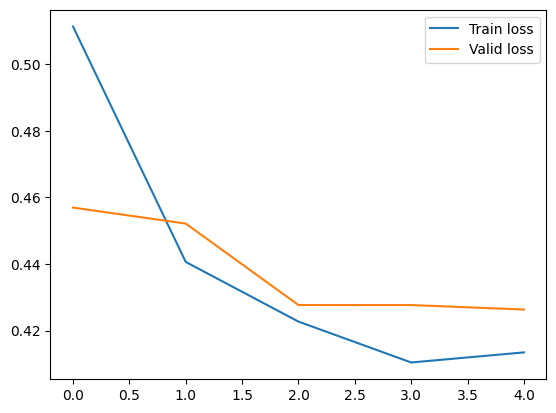

In [50]:
#Loss plot
plt.plot(history.epoch, history.history["loss"], label="Train loss")
plt.plot(history.epoch, history.history["val_loss"], label="Valid loss")
plt.legend()

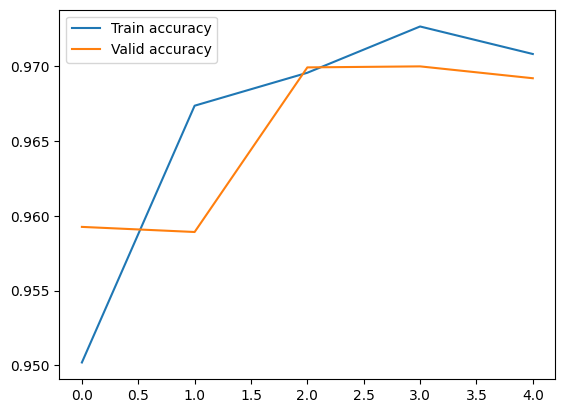

In [51]:
#Accuracy Plot
plt.plot(history.epoch, history.history["accuracy"], label="Train accuracy")
plt.plot(history.epoch, history.history["val_accuracy"], label="Valid accuracy")
plt.legend()

In [53]:
folder = '/content/stage_2_test_images'
test_filenames = os.listdir(folder)
# create test generator with predict flag set to True
test_gen = generator(folder, test_filenames, None, batch_size=100, image_size=128, shuffle=False, predict=True)

In [55]:
from sklearn.metrics import average_precision_score

In [58]:
pred = model.predict(test_gen)

30/30 [==============================] - 172s 6s/step


In [61]:
pred

array([[[[0.00104308],
         [0.00104308],
         [0.00104308],
         ...,
         [0.00097264],
         [0.00097264],
         [0.00097264]],

        [[0.00104308],
         [0.00104308],
         [0.00104308],
         ...,
         [0.00097264],
         [0.00097264],
         [0.00097264]],

        [[0.00104308],
         [0.00104308],
         [0.00104308],
         ...,
         [0.00097264],
         [0.00097264],
         [0.00097264]],

        ...,

        [[0.00116694],
         [0.00116694],
         [0.00116694],
         ...,
         [0.00059389],
         [0.00059389],
         [0.00059389]],

        [[0.00116694],
         [0.00116694],
         [0.00116694],
         ...,
         [0.00059389],
         [0.00059389],
         [0.00059389]],

        [[0.00116694],
         [0.00116694],
         [0.00116694],
         ...,
         [0.00059389],
         [0.00059389],
         [0.00059389]]],


       [[[0.0011726 ],
         [0.0011726 ],
         [0.00

In [72]:

# create test generator with predict flag set to True

folder = '/content/stage_2_test_images'
test_filenames = os.listdir(folder)

# create test generator with predict flag set to True
test_gen = generator(folder, test_filenames, None, batch_size=100, image_size=128, shuffle=False, predict=True)

# create submission dictionary
submission_dict = {}
# loop through testset
for imgs, filenames in test_gen:
    # predict batch of images
    preds = model.predict(imgs)
    # loop through batch
    for pred, filename in zip(preds, filenames):
        # resize predicted mask
        pred = resize(pred, (1024, 1024), mode='reflect')
        # threshold predicted mask
        comp = pred[:, :, 0] > 0.5
        # apply connected components
        comp = measure.label(comp)
        # apply bounding boxes
        predictionString = ''
        for region in measure.regionprops(comp):
            # retrieve x, y, height and width
            y, x, y2, x2 = region.bbox
            height = y2 - y
            width = x2 - x
            # proxy for confidence score
            conf = np.mean(pred[y:y+height, x:x+width])
            # add to predictionString
            predictionString += str(conf) + ' ' + str(x) + ' ' + str(y) + ' ' + str(width) + ' ' + str(height) + ' '
        # add filename and predictionString to dictionary
        filename = filename.split('.')[0]
        submission_dict[filename] = predictionString
    # stop if we've got them all
    if len(submission_dict) >= len(test_filenames):
        break

# save dictionary as csv file
sub = pd.DataFrame.from_dict(submission_dict,orient='index')
sub.index.names = ['patientId']
sub.columns = ['PredictionString']
sub.to_csv('submission.csv')

4/4 [==============================] - 0s 39ms/step


In [74]:
dt = pd.read_csv('submission.csv')


In [75]:
dt

,patientId,PredictionString
0,2fcba0c2-b470-4d23-8701-f4d2fdfd700f,0.60085964 515 386 123 124
1,10dd06b3-dfd5-4bfb-b2d2-184e8fc4d9be,NaN
2,11d66121-49b9-4365-8c43-f9d3474e7c52,NaN
3,1b90407a-e937-47f8-8cf1-8f801733b78b,NaN
4,2c96653c-ddeb-419a-ad37-8836eab89773,0.63694537 129 386 253 255
...,...,...
2995,310d7a3d-488e-4abb-aee2-051361807739,NaN
2996,26c07956-e243-4d83-82ea-b8da718b0e53,NaN
2997,20020bf8-2fda-4ba6-b1d3-d573c8956069,0.79547364 129 383 255 257 0.8041986 640 510 1...
2998,237e9d10-fbb2-4dd0-a808-999a37cee304,NaN
